In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('data/preprocessed_data.csv')
data.head(5)

,User-ID,Book-Rating,Book-Author,Year-Of-Publication,Location,Age,raw_title,categories
0,2313,7,raybradbury,1984.0,usa,23.0,themartianchronicles,fiction
1,2313,8,johnokada,1978.0,usa,23.0,nonoboy,japanese
2,6543,8,raybradbury,1976.0,usa,34.0,fahrenheit451,bookburning
3,6543,9,jamespatterson,2001.0,usa,34.0,1sttodieanovel,fiction
4,6543,6,alexandermccallsmith,2002.0,usa,34.0,theno1ladiesdetectiveagency,botswana


In [3]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Year-Of-Publication'] = data['Year-Of-Publication'].fillna(data['Year-Of-Publication'].median())

In [4]:
scaler = StandardScaler()
data['Age'] = scaler.fit_transform(np.array(data['Age']).reshape(-1, 1))
data['Year-Of-Publication'] = scaler.fit_transform(np.array(data['Year-Of-Publication']).reshape(-1, 1))
data.head(5)

,User-ID,Book-Rating,Book-Author,Year-Of-Publication,Location,Age,raw_title,categories
0,2313,7,raybradbury,-0.670241,usa,-1.171054,themartianchronicles,fiction
1,2313,8,johnokada,-1.207090,usa,-1.171054,nonoboy,japanese
2,6543,8,raybradbury,-1.386040,usa,-0.227732,fahrenheit451,bookburning
3,6543,9,jamespatterson,0.850831,usa,-0.227732,1sttodieanovel,fiction
4,6543,6,alexandermccallsmith,0.940306,usa,-0.227732,theno1ladiesdetectiveagency,botswana


In [5]:
cut_data = data[['User-ID', 'raw_title', 'Book-Rating', 'Year-Of-Publication', 'Age', 'Book-Author', 'Location']]
cut_data.head(5)

,User-ID,raw_title,Book-Rating,Year-Of-Publication,Age,Book-Author,Location
0,2313,themartianchronicles,7,-0.670241,-1.171054,raybradbury,usa
1,2313,nonoboy,8,-1.207090,-1.171054,johnokada,usa
2,6543,fahrenheit451,8,-1.386040,-0.227732,raybradbury,usa
3,6543,1sttodieanovel,9,0.850831,-0.227732,jamespatterson,usa
4,6543,theno1ladiesdetectiveagency,6,0.940306,-0.227732,alexandermccallsmith,usa


In [6]:
label_encoder = LabelEncoder()
cut_data['raw_title'] = label_encoder.fit_transform(cut_data['raw_title'])
cut_data['Book-Author'] = label_encoder.fit_transform(cut_data['Book-Author'])
cut_data['Location'] = label_encoder.fit_transform(cut_data['Location'])
cut_data.head(5)

C:\Users\79237\AppData\Local\Temp\ipykernel_14496\389378534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data['raw_title'] = label_encoder.fit_transform(cut_data['raw_title'])
C:\Users\79237\AppData\Local\Temp\ipykernel_14496\389378534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data['Book-Author'] = label_encoder.fit_transform(cut_data['Book-Author'])
C:\Users\79237\AppData\Local\Temp\ipykernel_14496\389378534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,User-ID,raw_title,Book-Rating,Year-Of-Publication,Age,Book-Author,Location
0,2313,11266,7,-0.670241,-1.171054,8308,110
1,2313,7036,8,-1.207090,-1.171054,5065,110
2,6543,3469,8,-1.386040,-0.227732,8308,110
3,6543,39,9,0.850831,-0.227732,4264,110
4,6543,11466,6,0.940306,-0.227732,176,110


In [7]:
cut_data = cut_data.rename(columns={'User-ID': 'user-id', 'raw_title': 'book-id', 'Book-Rating': 'rating', 'Age': 'age', 'Year-Of-Publication': 'year', 'Book-Author': 'author', 'Location': 'location'})
cut_data.head(5)

,user-id,book-id,rating,year,age,author,location
0,2313,11266,7,-0.670241,-1.171054,8308,110
1,2313,7036,8,-1.207090,-1.171054,5065,110
2,6543,3469,8,-1.386040,-0.227732,8308,110
3,6543,39,9,0.850831,-0.227732,4264,110
4,6543,11466,6,0.940306,-0.227732,176,110


In [8]:
cut_data['rating'] = cut_data['rating'].astype(float)
cut_data.head(5)

,user-id,book-id,rating,year,age,author,location
0,2313,11266,7.0,-0.670241,-1.171054,8308,110
1,2313,7036,8.0,-1.207090,-1.171054,5065,110
2,6543,3469,8.0,-1.386040,-0.227732,8308,110
3,6543,39,9.0,0.850831,-0.227732,4264,110
4,6543,11466,6.0,0.940306,-0.227732,176,110


In [9]:
X = cut_data[['user-id', 'book-id', 'year', 'age', 'author', 'location']]
y = cut_data['rating']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
all_users = X_train['user-id'].unique()
all_books = X_train['book-id'].unique()
all_authors = X_train['author'].unique()
all_locations = X_train['location'].unique()

In [12]:
year_input = keras.layers.Input(shape=(1,), name="Year")
age_input = keras.layers.Input(shape=(1,), name="Age")
concat_layer = keras.layers.Concatenate(axis=-1)([year_input, age_input])
concat_layer1 = keras.layers.Dense(32, activation="relu")(concat_layer)
concat_layer2 = keras.layers.Dense(32, activation="relu")(concat_layer1)
concat_layer3 = keras.layers.Dense(1, activation="relu")(concat_layer2)

In [13]:
#user_input = keras.layers.Input(shape=(1,), name="User")
#user_as_integer = keras.layers.IntegerLookup(vocabulary=all_users)(user_input)
#location_input = keras.layers.Input(shape=(1,), name="Location")
#location_as_integer = keras.layers.IntegerLookup(vocabulary=all_locations)(location_input)
#user_info = keras.layers.Concatenate()([user_input, location_input])

In [14]:
#book_input = keras.layers.Input(shape=(1,), name="Book")
#book_as_integer = keras.layers.IntegerLookup(vocabulary=all_books)(book_input)
#author_input = keras.layers.Input(shape=(1,), name="Author")
#author_as_integer = keras.layers.IntegerLookup(vocabulary=all_authors)(author_input)
#book_info = keras.layers.Concatenate()([book_input, author_input])

In [15]:
user_input = keras.layers.Input(shape=(1,), name="User")
user_as_integer = keras.layers.IntegerLookup(vocabulary=all_users)(user_input)
user_embedding = keras.layers.Embedding(input_dim=len(all_users) + 1, output_dim=32, embeddings_regularizer=keras.regularizers.l2(0.1))(user_as_integer)
user_bias = keras.layers.Embedding(input_dim=len(all_users) + 1, output_dim=1)(user_as_integer)

In [16]:
book_input = keras.layers.Input(shape=(1,), name="Book")
book_as_integer = keras.layers.IntegerLookup(vocabulary=all_books)(book_input)
book_embedding = keras.layers.Embedding(input_dim=len(all_books) + 1, output_dim=32, embeddings_regularizer=keras.regularizers.l2(0.1))(book_as_integer)
book_bias = keras.layers.Embedding(input_dim=len(all_books) + 1, output_dim=1)(book_as_integer)

In [17]:
dot_product = keras.layers.Dot(axes=-1)([user_embedding, book_embedding])
add = keras.layers.Add()([dot_product, user_bias, book_bias, concat_layer3])
flatten = keras.layers.Flatten()(add)

In [18]:
output = keras.layers.Lambda(lambda x: 9 * math.sigmoid(x) + 1, name="Rating")(flatten)

In [19]:
model = keras.Model(inputs=[user_input, book_input, year_input, age_input], outputs=output)
model.compile(loss="mse")

In [20]:
history = model.fit(x=[X_train['user-id'], X_train['book-id'], X_train['year'], X_train['age']], y=y_train, batch_size=256, epochs=40, validation_split=0.1)

Epoch 1/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 19.6729 - val_loss: 3.3042
Epoch 2/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 3.1477 - val_loss: 3.2475
Epoch 3/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 3.0619 - val_loss: 3.2022
Epoch 4/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 3.0173 - val_loss: 3.1737
Epoch 5/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.9608 - val_loss: 3.1407
Epoch 6/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.8895 - val_loss: 3.1134
Epoch 7/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.8479 - val_loss: 3.0918
Epoch 8/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.7849 - val_loss: 3.0840
Epoch 9/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.7589 - val_loss: 3.0574
Epoch 10/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.7258 - val_loss: 3.0384
Epoch 11/40
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.6873 - val_loss: 3.0275
Epoch 12/40
196/196 ━━━━━━━━━━━━━━━━━━━━

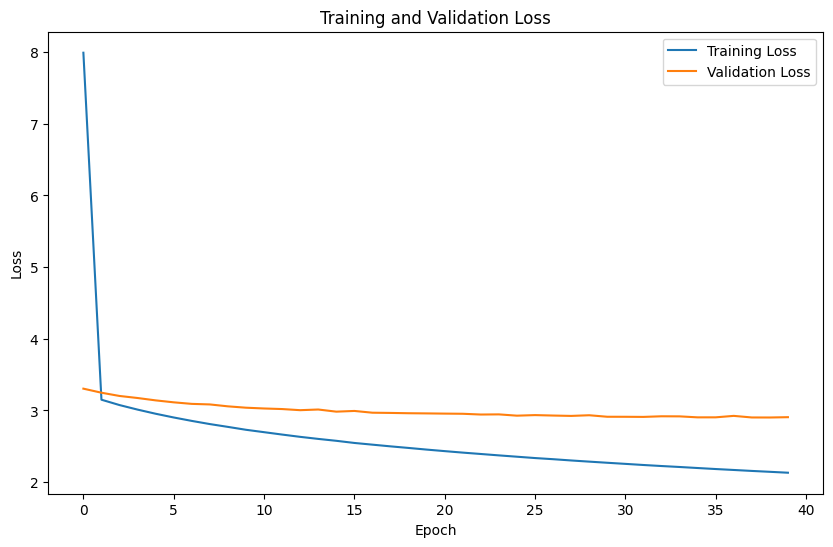

In [21]:
history_df = pd.DataFrame({'loss': history.history['loss'], 'val_loss': history.history['val_loss']}).reset_index(drop=False).rename(columns={'index': 'epoch'})
plt.figure(figsize=(10, 6))
sns.lineplot(x=history_df['epoch'], y=history_df['loss'], label='Training Loss')
sns.lineplot(x=history_df['epoch'], y=history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
test_scores = model.evaluate(x=[X_test['user-id'], X_test['book-id'], X_test['year'], X_test['age']], y=y_test)

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7143


In [23]:
r2_score(y_test, np.ravel(model.predict([X_test['user-id'], X_test['book-id'], X_test['year'], X_test['age']])))

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


0.1566379409528399

In [24]:
def get_recommendation(user_id, data, model, number):
    pred_data = data[data['user-id'] != user_id]
    book_id = pred_data.groupby('book-id').nth(0)['book-id']
    year = pred_data.groupby('book-id').nth(0)['year']
    user_age = pd.Series(np.array([data['age'][list(data['user-id']).index(user_id)]] * year.shape[0]))
    user_id = pd.Series(np.array([user_id] * year.shape[0]))
    predictions = model.predict(x=[user_id, book_id, year, user_age]).flatten()
    rec_indices = np.argsort(predictions)[::-1][:number]
    return np.array(book_id.iloc[rec_indices])

In [60]:
values = get_recommendation(2313, cut_data, model, 10)
values

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([10847, 10705,  5358, 12130, 10846,  1018, 12800,  5608,  5936,
       11290])

In [26]:
#keras.utils.plot_model(model, to_file="model.png", show_shapes=True)
#model.save("model.keras")

In [ ]:
class RecSys:
    def __init__(self, model, model_data, main_data):
        self.model = keras.models.load_model(model)
        self.model_data = pd.read_csv(model_data)
        self.main_data = pd.read_csv(main_data)
    def get_recommendations(self, user_id, n=10):
        pred_data = self.model_data[self.model_data['user-id'] != user_id]
        book_id = pred_data.groupby('book-id').nth(0)['book-id']
        year = pred_data.groupby('book-id').nth(0)['year']
        user_age = pd.Series(np.array([self.model_data['age'][list(self.model_data['user-id']).index(user_id)]] * year.shape[0]))
        user_id = pd.Series(np.array([user_id] * year.shape[0]))
        predictions = self.model.predict(x=[user_id, book_id, year, user_age]).flatten()
        rec_indexes = np.argsort(predictions)[::-1][:n]
        rec_values = np.array(book_id.iloc[rec_indexes])
        return self.main_data[self.main_data['book-id'].isin(rec_values)]['raw_title'].unique().tolist()        
    def get_user_history(self, user_id, n=10):
        return self.main_data[self.main_data['User-ID'] == user_id]['raw_title'].head(n).tolist()
    def get_popular_books(self, n=10):
        return self.main_data['raw_title'].value_counts().head(n).reset_index()['raw_title'].tolist()